<a href="https://colab.research.google.com/github/KavyaAyoti/MINOR-PROJECT/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MINOR PROJECT
#IMAGE PROCESSING

In [1]:
import cv2
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
train_path="/content/drive/MyDrive/TRAIN/"
test_path="/content/drive/MyDrive/TEST_/"
img=[]
gray_image=[]
labels=[]
i=0
for count, filename in enumerate(os.listdir("/content/drive/MyDrive/TRAIN/")):
  path="/content/drive/MyDrive/TRAIN/" + filename
  img.append(cv2.imread(path))
  gray_image.append(cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY))
  if "paper" in filename:
    labels.append("paper")
  elif "rock" in filename:
    labels.append("rock")
  else:
    labels.append("scissors")
  i+=1







In [2]:
test_labels=[]
test_images=[]
image=[]
j=0
for count, filename in enumerate(os.listdir("/content/drive/MyDrive/TEST_/")):
  path="/content/drive/MyDrive/TEST_/" + filename
  image.append(cv2.imread(path))
  test_images.append(cv2.cvtColor(image[j], cv2.COLOR_BGR2GRAY))
  if "paper" in filename:
    test_labels.append("paper")
  elif "rock" in filename:
    test_labels.append("rock")
  else:
    test_labels.append("scissors")
  j=j+1

paper
paper
paper
paper
paper


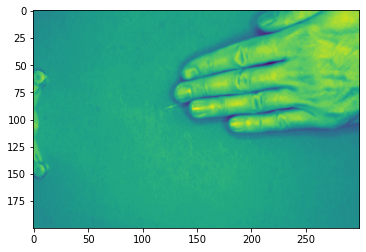

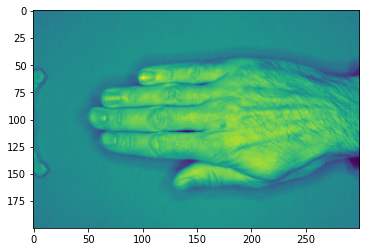

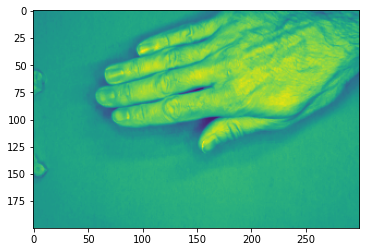

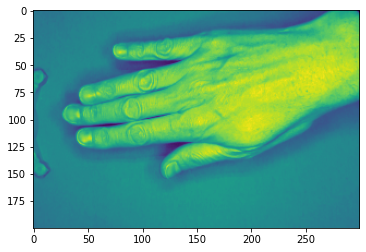

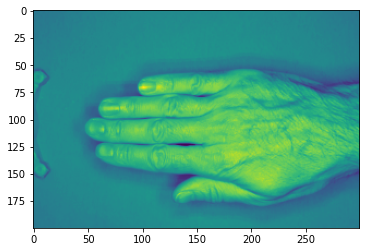

In [3]:
for j in range(5,10):
  print(test_labels[j])
  plt.figure()
  plt.imshow(test_images[j])

In [4]:
train_data=np.asarray(gray_image)
test_data=np.asarray(test_images)
test_data

array([[[101, 102, 101, ..., 100,  99,  96],
        [100, 103, 104, ...,  99,  97,  99],
        [103, 103, 104, ...,  99,  99, 100],
        ...,
        [106, 107, 110, ..., 111, 111, 110],
        [107, 107, 107, ..., 110, 112, 111],
        [107, 106, 106, ..., 110, 110, 110]],

       [[ 89,  88,  86, ...,  86,  86,  85],
        [ 87,  87,  86, ...,  86,  85,  85],
        [ 88,  89,  90, ...,  88,  88,  87],
        ...,
        [ 85,  85,  86, ...,  86,  86,  86],
        [ 86,  85,  86, ...,  85,  85,  86],
        [ 85,  85,  85, ...,  85,  86,  85]],

       [[100, 100,  99, ...,  93,  88,  87],
        [101, 100, 100, ..., 101,  96,  97],
        [101, 100, 100, ..., 109, 103, 100],
        ...,
        [103, 103, 104, ...,  89,  89,  87],
        [103, 104, 104, ...,  89,  88,  89],
        [103, 105, 104, ...,  88,  88,  87]],

       ...,

       [[ 85,  86,  84, ...,  90,  88,  89],
        [ 84,  87,  84, ...,  88,  86,  88],
        [ 84,  87,  85, ...,  90,  88,  88

In [5]:
train_data=train_data.reshape(train_data.shape[0],200*300)
train_data.shape

(300, 60000)

In [6]:
test_data=test_data.reshape(test_data.shape[0],200*300)
test_data.shape

(50, 60000)

In [7]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_data,labels)
k=model.predict(test_data)
k

array(['rock', 'paper', 'rock', 'paper', 'paper', 'paper', 'paper',
       'rock', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper',
       'paper', 'paper', 'scissors', 'rock', 'rock', 'rock', 'rock',
       'rock', 'rock', 'rock', 'rock', 'rock', 'rock', 'paper', 'rock',
       'rock', 'rock', 'rock', 'scissors', 'scissors', 'scissors',
       'scissors', 'rock', 'rock', 'scissors', 'rock', 'scissors',
       'scissors', 'paper', 'rock', 'rock', 'scissors', 'scissors',
       'scissors', 'scissors', 'scissors'], dtype='<U8')

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(k,test_labels)

0.78

In [9]:
from sklearn.model_selection import GridSearchCV

model1 = KNeighborsClassifier()

params = {
    'n_neighbors' : [5, 25], }
gridcvmodel =GridSearchCV (estimator = model1 , param_grid =params )

In [10]:
gridcvmodel.fit(train_data,labels)
y_pred=gridcvmodel.predict(test_data)
y_pred

array(['paper', 'paper', 'rock', 'paper', 'paper', 'paper', 'paper',
       'rock', 'paper', 'paper', 'paper', 'paper', 'paper', 'paper',
       'paper', 'paper', 'rock', 'paper', 'rock', 'rock', 'rock', 'rock',
       'rock', 'rock', 'rock', 'rock', 'rock', 'paper', 'rock', 'rock',
       'rock', 'rock', 'scissors', 'scissors', 'scissors', 'scissors',
       'rock', 'paper', 'scissors', 'rock', 'scissors', 'scissors',
       'paper', 'rock', 'scissors', 'scissors', 'scissors', 'scissors',
       'rock', 'scissors'], dtype='<U8')

In [11]:
print(y_pred==test_labels)

[ True  True False  True  True  True  True False  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
 False False  True False  True  True False False  True  True  True  True
 False  True]


In [12]:
accuracy_score(y_pred,test_labels)

0.8

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,test_labels))

              precision    recall  f1-score   support

       paper       0.88      0.78      0.82        18
        rock       0.88      0.70      0.78        20
    scissors       0.67      1.00      0.80        12

    accuracy                           0.80        50
   macro avg       0.81      0.83      0.80        50
weighted avg       0.82      0.80      0.80        50

